### Methode :

- Méthode à hypothèse gaussienne, Naive Bayes -> GaussianNB
- Régression logistique
- SVM
- SGD
- Réseaux de neurones MLP
- Random Forest
- Bagging : vote majoritaa
	



In [25]:
import sklearn
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from src.models.train_model import CrossValidate
from src.models.metrics import Measure

import warnings

warnings.filterwarnings("ignore")


Leaf Classification

In [26]:
data_dir_path = '../data/external'
data = pd.read_csv(data_dir_path + "/train.csv")

## Pre-traitement des données
### Separer les classes de features
`y_train` = classes or label
`x_train` = features

In [27]:
data.head(10)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.00000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.00000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.00000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.00000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.0,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.00000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.0,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.00000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.0,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.00000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.19238,0.000000,0.074219,0.000000,0.000000


## Mise à l'échelle et Encodage d'etiquette

(La class LeafDataPreprocessing nous permet de réaliser ces prétraitements à ce niveau)

#### Mise à l'échelle
La mise à l'échelle des données, ou normalisation, est une étape cruciale en prétraitement des données. le but :

1. **Uniformité**: Elle assure que toutes les caractéristiques numériques contribuent également à l'analyse sans être biaisées par leur échelle d'origine.

2. **Meilleure convergence**: Beaucoup d'algorithmes de machine learning, comme les réseaux de neurones et les méthodes de descente de gradient, convergent plus rapidement lorsque les données sont mises à l'échelle.

3. **Amélioration des performances**: Certains algorithmes, en particulier ceux qui utilisent des mesures de distance comme k-means ou k-NN, ont de meilleures performances si toutes les caractéristiques sont sur une échelle comparable.

4. **Stabilité numérique**: La mise à l'échelle peut aussi aider à éviter des problèmes numériques qui peuvent survenir lorsque les caractéristiques ont des ordres de grandeur très différents.

En somme, la mise à l'échelle des données aide à rendre le processus d'apprentissage automatique plus efficace et plus stable.

In [28]:
from src.data.preprocessing_data import LeafDataPreprocessing
processed_data = LeafDataPreprocessing(data=data, normalized=True)


In [29]:
processed_data.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [30]:
classes = processed_data.get_classes()

print("Nombre  de classe : ", classes.shape)

Nombre  de classe :  (99,)


In [31]:
t_train = processed_data.y_train
d_train = processed_data.x_train

In [32]:
print("Nombre de features  :", d_train.shape)
print("Nombre de classe :", t_train.shape)


Nombre de features  : (990, 192)
Nombre de classe : (990,)


Séparation des données

In [33]:
x_train,x_test, y_train, y_test = processed_data.split_train_and_test(d_train, t_train, ratio=0.2)
print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)
print("x_test shape :", x_test.shape)
print("y_test shape :", y_test.shape)

x_train shape : (792, 192)
y_train shape : (792,)
x_test shape : (198, 192)
y_test shape : (198,)


# Experimentation 

##### (6 methode)
- Méthode à hypothèse gaussienne, Naive Bayes -> GaussianNB
- Régression logistique
- SVM
- SGD
- Réseaux de neurones MLP
- Random Forest
- Bagging : vote majoritaa


## Entrainment avec une méthode gaussienne

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
# Créer un modèle Naive Bayes gaussien
gnb = GaussianNB()

# Entraîner le modèle sur les données d'entraînement
gnb.fit(x_train, y_train)

metrics = Measure(gnb,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()



Train Score:
Accuracy : 0.9987373737373737
Precision : 0.9988776655443322
Recall : 0.9987373737373737
F1-score : 0.998732422261834

Test Score :
Accuracy : 0.6111111111111112
Precision : 0.6080246913580247
Recall : 0.6111111111111112
F1-score : 0.5720888539070358


Il semble que la méthode Gaussienne ne donne pas de bons résultats si nous regardons les tests (il surapprend sur les données d'entrainement), nous allons passer un test de normalités pour voir si nos sont suivent une distribution gaussienne (Tests statistique).

### Tests (statistique) d'hypothèse gaussienne des données

Nous avons effectué 3 test :

Test de Shapiro-Wilk :
- Le test de Shapiro-Wilk est utilisé pour tester l'hypothèse nulle selon laquelle un échantillon provient d'une population normalement distribuée. Il est particulièrement adapté aux petits échantillons et est considéré comme l'un des tests les plus puissants pour détecter les écarts par rapport à la normalité.
	
Test de Kolmogorov-Smirnov :
- Le test de Kolmogorov-Smirnov est un test non paramétrique qui compare la distribution cumulative d'un échantillon avec une distribution de référence ou compare deux échantillons pour déterminer s'ils proviennent de la même distribution. Il est utile pour les grands échantillons et est sensible aux différences dans les emplacements et les formes des distributions.
	
Test d'Anderson-Darling :
- Le test d'Anderson-Darling est similaire au test de Kolmogorov-Smirnov, mais il donne plus de poids aux queues de la distribution de l'échantillon. Cela le rend plus sensible aux écarts dans les extrémités de la distribution et c'est un choix robuste pour tester la normalité.


In [35]:
from src.data.normality_check import NormalityDistributionCheck
# 'get_processed_data()' est un DataFrame avec la forme (990, 192)
xdata = processed_data.get_processed_data().to_numpy() 
normality_check = NormalityDistributionCheck(data=xdata)

In [36]:
# Test de Shapiro-Wilk pour la normalité
# Ce test est adapté pour les petits échantillons (< 5000)
normality_check.shapiro_wilk_test()


Valeur de la statistique de test (Shapiro-Wilk) : 0.04047077539927135
Valeur-p (p-value) : 3.310562594061702e-201
L'hypothèse de normalité est rejetée.


In [37]:
# Test de Kolmogorov-Smirnov (comparaison avec une distribution normale)
normality_check.kolmogorov_smirnov_test()

Statistique de test (Kolmogorov-Smirnov) : 0.5
Valeur-p (p-value) : 0.0
L'hypothèse de normalité est rejetée.


In [38]:
# Test d'Anderson-Darling (comparaison avec une distribution normale)
normality_check.anderson_darling_test()

Statistique de test (Anderson-Darling) : 72341.24445513345
A un niveau de signification de 15.0%, les données ne semblent pas normales (statistique >= 0.576).
A un niveau de signification de 10.0%, les données ne semblent pas normales (statistique >= 0.656).
A un niveau de signification de 5.0%, les données ne semblent pas normales (statistique >= 0.787).
A un niveau de signification de 2.5%, les données ne semblent pas normales (statistique >= 0.918).
A un niveau de signification de 1.0%, les données ne semblent pas normales (statistique >= 1.092).


Les trois tests de normalité effectuée jusque lá, montre que les données ne semble pas suivre une distribution gaussienne.


### RE-entrainment avec methode gaussienne avec la recherche de meilleures hyperparametres

In [39]:
from sklearn.naive_bayes import GaussianNB

# Définir la grille de valeurs pour var_smoothing à rechercher
gnb_params = {'var_smoothing': [1e-9, 1e-7, 1e-6, 1e-5, 1e-3, 1e-2]}

# Initialiser le classifieur GaussianNB
gnb_model = GaussianNB()

# Initialiser GridSearchCV avec le classifieur et la grille de paramètres
gnb_cross_val = CrossValidate(model=gnb_model, params=gnb_params, k_fold=4, metric='accuracy')
# Effectuer la recherche des meilleurs paramètres en utilisant les données d'entraînement
gnb_cross_val.train(x_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleur var_smoothing trouvé:", gnb_cross_val.best_params)
print("Meilleur score d'accuracy trouvé:", gnb_cross_val.best_score)

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_gnb_model = gnb_cross_val.best_model
metrics = Measure(best_gnb_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()


Meilleur var_smoothing trouvé: {'var_smoothing': 0.01}
Meilleur score d'accuracy trouvé: 0.9772727272727272

Train Score:
Accuracy : 0.9987373737373737
Precision : 0.9988776655443322
Recall : 0.9987373737373737
F1-score : 0.998732422261834

Test Score :
Accuracy : 0.9848484848484849
Precision : 0.9915824915824917
Recall : 0.9848484848484849
F1-score : 0.9845117845117846


# Entrainement sur des méthodes sans hypothèses


## Experimentation sur Random Forest

Implementation naive du Random Forest avec ses parametres par défaut,

In [40]:
from sklearn.model_selection import cross_val_score

rfc_model1 = RandomForestClassifier(n_estimators=20, max_features= None, max_depth = 10, oob_score = True)
rfc_model1.fit(x_train, y_train)

print("OOB error score : ", rfc_model1.oob_score_)
metrics = Measure(rfc_model1,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()


OOB error score :  0.3472222222222222

Train Score:
Accuracy : 0.8320707070707071
Precision : 0.8505021353506202
Recall : 0.8320707070707071
F1-score : 0.8226441410135942

Test Score :
Accuracy : 0.6111111111111112
Precision : 0.5965488215488216
Recall : 0.6111111111111112
F1-score : 0.575091575091575


#### Mesure de la performance sur les nombres d'arbres différents

Le score OOB (Out of Bag) est un moyen de valider les performances d'un modèle Random Forest.
	
Dans une forêt aléatoire, plusieurs arbres de décision sont formés sur différents sous-ensembles de données de formation originales à l'aide d'une technique appelée bagging (Bootstrap Aggregation).
	
Chaque arbre est formé sur un échantillon bootstrap (un sous-ensemble aléatoire de données avec remplacement).
	
Le score OOB est calculé en évaluant les prédictions du modèle sur les échantillons sortis du sac (points de données qui n'étaient pas inclus dans l'échantillon bootstrap pour un arbre particulier).
	
Essentiellement, chaque arbre est testé sur les points de données qu’il n’a pas vus lors de la formation.
	
Le score OOB fournit une estimation de la capacité du modèle à se généraliser à des données invisibles.

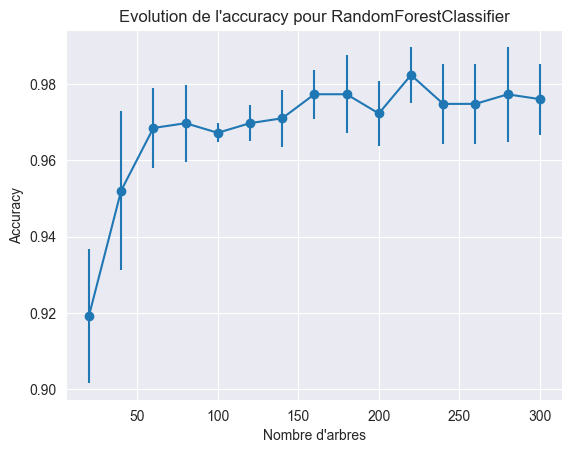

In [41]:
from src.features.utils import find_best_split
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Effectuer la validation croisée stratifiée avec différentes valeurs pour le nombre d'arbres
min_trees = 20
max_trees = 300
num_trees = list(range(min_trees, max_trees+1, 20))
mean_accuracy = [] # moyen
std_accuracy = [] # ecart-type

# Trouver un n_split pour notre ensemble de données
n_splits, _ = find_best_split(x_train.shape[0], 5)

# Boucle sur chaque nombre d'arbres à tester
for n_trees in num_trees:
    rf_clf = RandomForestClassifier(n_estimators=n_trees)
    
    # Utiliser la validation croisée stratifiée
    accuracy_scores = CrossValidate.cv_score(rf_clf, x_train, y_train, scoring='accuracy')
    
    # Calculer la moyenne et l'écart type des scores d'accuracy
    mean_accuracy.append(np.mean(accuracy_scores))
    std_accuracy.append(np.std(accuracy_scores))

# Afficher la courbe de l'accuracy en fonction du nombre d'arbres
plt.errorbar(num_trees, mean_accuracy, yerr=std_accuracy, fmt='-o')
plt.title('Evolution de l\'accuracy pour RandomForestClassifier')
plt.xlabel('Nombre d\'arbres')
plt.ylabel('Accuracy')
plt.show()


Plus nous augmentons les nombres d'arbre plus la precision augmente

### Mesure de l'erreur sur les nombres d'arbres différents

Experimentation sur trois arbres différents

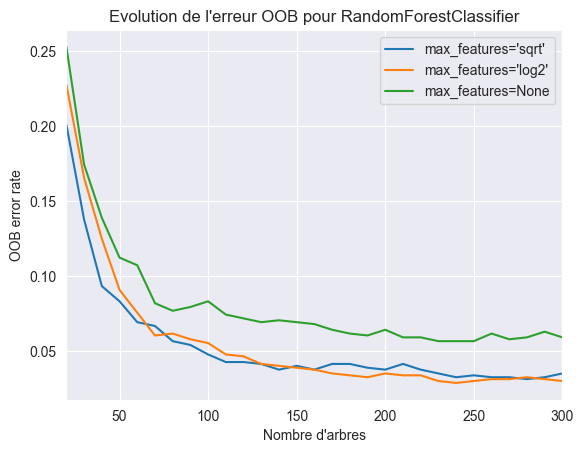

In [42]:
from collections import OrderedDict

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42

# REMARQUE : définir le paramètre de construction `warm_start` sur `True` désactive la prise en charge des ensembles parallélisés mais est nécessaire pour suivre la trajectoire des erreurs OOB pendant la formation.

# Chaque arbre à un nombre de caractéristiques différent [max_features] à considérer lors de la recherche de la meilleure division pour chaque nœud de l’arbre.
ensemble_rf_clfs = [
    (
        "max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Mappez un nom de classificateur à une liste de paires (<n_estimators>, <error rate>).
error_rate = OrderedDict((label, []) for label, _ in ensemble_rf_clfs)

# Plage de valeurs `n_estimators` à explorer.
min_estimators = 20
max_estimators = 300


for label, clf in ensemble_rf_clfs:
    for i in range(min_estimators, max_estimators + 1, 10):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Enregistrez l'erreur OOB pour chaque paramètre `n_estimators=i`.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Générez le tracé « Taux d'erreur OOB » par rapport aux « n_estimators ».
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
    
plt.title('Evolution de l\'erreur OOB pour RandomForestClassifier')
plt.xlim(min_estimators, max_estimators)
plt.xlabel("Nombre d\'arbres")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

### Random Forest : La recherche de meilleurs d'hyperparamètres

In [43]:
# Définir les hyperparamètres à rechercher
rfc_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion':["gini", "entropy", "log_loss"]
}

# Créer une instance du modèle Random Forest
rfc_model = RandomForestClassifier(oob_score=True)

# Effectuer une recherche des hyperparamètres avec validation croisée
rfc_cross_val = CrossValidate(model=rfc_model, params=rfc_param_grid, k_fold=4, metric='accuracy')
rfc_cross_val.train(x_train, y_train)

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_hp_rfc = rfc_cross_val.best_params
best_rfc_model = rfc_cross_val.best_model
best_rfc_model.fit(x_train, y_train)
# Afficher les meilleurs hyperparamètres trouvés
print("Ramdom Forest Meilleurs hyperparamètres :", best_hp_rfc)
metrics = Measure(best_rfc_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()

Ramdom Forest Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

Train Score:
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1-score : 1.0

Test Score :
Accuracy : 0.9797979797979798
Precision : 0.9882154882154882
Recall : 0.9797979797979798
F1-score : 0.9791245791245792


Nous obtenons des meilleurs performances aprés la recherche meilleurs hyperparamètres comparé aux résultat précédant du Random Forest

## Support Vector Machine

Implementation naïve de SVM

In [44]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)

metrics = Measure(svc_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()


Train Score:
Accuracy : 0.9974747474747475
Precision : 0.9977553310886643
Recall : 0.9974747474747475
F1-score : 0.997464844523668

Test Score :
Accuracy : 0.9797979797979798
Precision : 0.9865319865319865
Recall : 0.9797979797979798
F1-score : 0.9784511784511786


 On peut remarquer une amélioration des performances après la recherche d'hyperparamètres du point de vue de la métrique de justesse (accuracy) 
 


Learning Curve? Une question intéressante qu'on peut se poser est s'il serait intéressant de chercher à récolter d'autres données. Autrement dit si la quantité de données influencent assez les performaces. Au travers de la courbe d'apprentissage, il est possible de s'en faire une idée

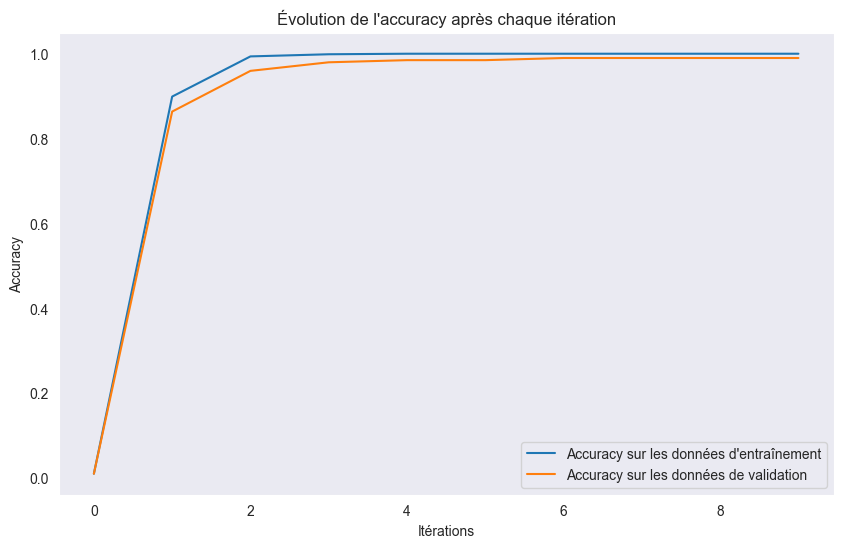

In [45]:
acc_iter_svm_train = []
acc_iter_svm_test = []

for i in range(10):
    svc_iter = SVC(C= 0.1, degree = 1, gamma = 10, kernel= 'poly', max_iter=i)
    svc_iter.fit(x_train, y_train)
    y_pred_train = svc_iter.predict(x_train)
    y_pred_test = svc_iter.predict(x_test)
    accu_svm_train = accuracy_score(y_train, y_pred_train)    
    accu_svm_test = accuracy_score(y_test, y_pred_test) 
    acc_iter_svm_train.append(accu_svm_train)
    acc_iter_svm_test.append(accu_svm_test)


plt.figure(figsize=(10, 6))
plt.plot(range(10), acc_iter_svm_train, label='Accuracy sur les données d\'entraînement')
plt.plot(range(10), acc_iter_svm_test, label='Accuracy sur les données de validation')
plt.xlabel('Itérations')
plt.ylabel('Accuracy')
plt.title('Évolution de l\'accuracy après chaque itération')
plt.legend()
plt.grid()
plt.show()

#### La recherche d'hyperparametre pour le SVM

In [46]:
param_grid_svm = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'degree': np.arange(0, 11)
}
svc_model = SVC()

svm_cross_val = CrossValidate(model=svc_model, params=param_grid_svm, k_fold=4, metric='accuracy')
svm_cross_val.train(x_train, y_train)


# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_hp = svm_cross_val.best_params
best_lr_model = svm_cross_val.best_model

# Afficher les meilleurs hyperparamètres trouvés
print("SVM Meilleurs hyperparamètres :", best_hp)
metrics = Measure(best_lr_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()

SVM Meilleurs hyperparamètres : {'C': 0.1, 'degree': 1, 'gamma': 10, 'kernel': 'poly'}

Train Score:
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1-score : 1.0

Test Score :
Accuracy : 0.98989898989899
Precision : 0.9932659932659934
Recall : 0.98989898989899
F1-score : 0.9892255892255892


In [47]:
model_svc = SVC(C=0.1, degree=1, gamma=10, kernel='poly')

## Stochastic Gradient Descent

Implementation naïve de SGD

In [48]:
from sklearn.linear_model import SGDClassifier


sgdc_model = SGDClassifier()
sgdc_model.fit(x_train, y_train)

metrics = Measure(sgdc_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()


Train Score:
Accuracy : 0.9873737373737373
Precision : 0.9816928301776787
Recall : 0.9873737373737373
F1-score : 0.9836082942190456

Test Score :
Accuracy : 0.9242424242424242
Precision : 0.935858585858586
Recall : 0.9242424242424242
F1-score : 0.9168831168831169


#### La recherche d'hyperparametre pour la SGD

In [49]:
param_grid_sgdc = {
    'loss': ['hinge', 'perceptron', 'log_loss', 'log'],
    'penalty': ['l1', 'l2'],
    'alpha': [1e-4, 1.e-3, 1e-2, 1.e-1 , 1],  
}
sgdc_model = SGDClassifier()
sgd_cross_val = CrossValidate(model=sgdc_model, params=param_grid_sgdc, k_fold=4, metric='accuracy')
sgd_cross_val.train(x_train, y_train)

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_hp = sgd_cross_val.best_params
best_lr_model = sgd_cross_val.best_model
# Afficher les meilleurs hyperparamètres trouvés
print("SGD Meilleurs hyperparamètres :", best_hp)
metrics = Measure(best_lr_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()

SGD Meilleurs hyperparamètres : {'alpha': 0.001, 'loss': 'log_loss', 'penalty': 'l2'}

Train Score:
Accuracy : 0.9987373737373737
Precision : 0.9988776655443322
Recall : 0.9987373737373737
F1-score : 0.998732422261834

Test Score :
Accuracy : 0.9848484848484849
Precision : 0.9898989898989901
Recall : 0.9848484848484849
F1-score : 0.9838383838383837


 De la même manière qu'avec le modèle précédent, une amélioration nette et plus conséquente des performances est observée après la recherche d'hyperparamètres toujours du point de vue de la métrique de justesse(accuracy) 
 
La particularité de ce modèle(SGDC) est qu'il effectue un apprentissage itératif et mets à jour les paramètre au fur et à mesure de l,entrainement. D'où l'intérêt d'observer la convergence progressive de notre modèle.

In [50]:
from sklearn.metrics import accuracy_score, log_loss

model_sgdc = SGDClassifier(alpha=0.0001, loss='log_loss', penalty='l2')

losses_train = []     # Liste pour stocker les valeurs de la perte sur les données d'entraînement
accuracies_train = []  # Liste pour stocker les valeurs de l'accuracy sur les données d'entraînement
losses_val = []       # Liste pour stocker les valeurs de la perte sur les données de validation
accuracies_val = []   # Liste pour stocker les valeurs de l'accuracy sur les données de validation



batch_size = 32
nbr_epoch = int(len(x_train) / batch_size) + 1
train_batches = np.array_split(x_train, nbr_epoch)
target_batches = np.array_split(y_train, nbr_epoch)
max_iter = 15

for i in range(max_iter):
    for epoch in range(nbr_epoch):
        model_sgdc.partial_fit(train_batches[epoch], target_batches[epoch], classes=np.unique(y_train))
        
    # Calcul de la perte et de l'accuracy sur les données d'entraînement
    y_train_prob = model_sgdc.predict_proba(x_train)
    loss_train = log_loss(y_train, y_train_prob)
    y_pred_train = model_sgdc.predict(x_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    # Calcul de la perte et de l'accuracy sur les données de validation
    y_val_prob = model_sgdc.predict_proba(x_test)
    loss_val = log_loss(y_test, y_val_prob)
    y_pred_val = model_sgdc.predict(x_test)
    accuracy_val = accuracy_score(y_test, y_pred_val)
        
    # Stockage des valeurs
    losses_train.append(loss_train)
    accuracies_train.append(accuracy_train)
    losses_val.append(loss_val)
    accuracies_val.append(accuracy_val)
    print('Itération n°',i+1,': =============> acc train:', accuracy_train, 'loss train:', loss_train,' ¦¦ acc_test: ', accuracy_val, 'loss tess: ', loss_val)

Itération n° 1 : =============> acc train: 0.5517676767676768 loss train: 5.73439639647564  ¦¦ acc_test:  0.5050505050505051 loss tess:  7.809202503064327
Itération n° 2 : =============> acc train: 0.7222222222222222 loss train: 2.6719743518304067  ¦¦ acc_test:  0.6060606060606061 loss tess:  3.442129074122255
Itération n° 3 : =============> acc train: 0.9255050505050505 loss train: 0.9961388643002066  ¦¦ acc_test:  0.8484848484848485 loss tess:  1.3389739642524523
Itération n° 4 : =============> acc train: 0.9772727272727273 loss train: 0.17744296859980155  ¦¦ acc_test:  0.9141414141414141 loss tess:  0.4432954541235187
Itération n° 5 : =============> acc train: 0.9621212121212122 loss train: 0.450631013426913  ¦¦ acc_test:  0.9242424242424242 loss tess:  0.7700211572638516
Itération n° 6 : =============> acc train: 0.9861111111111112 loss train: 0.13274586939647137  ¦¦ acc_test:  0.9545454545454546 loss tess:  0.33294328243951843
Itération n° 7 : =============> acc train: 0.991161616

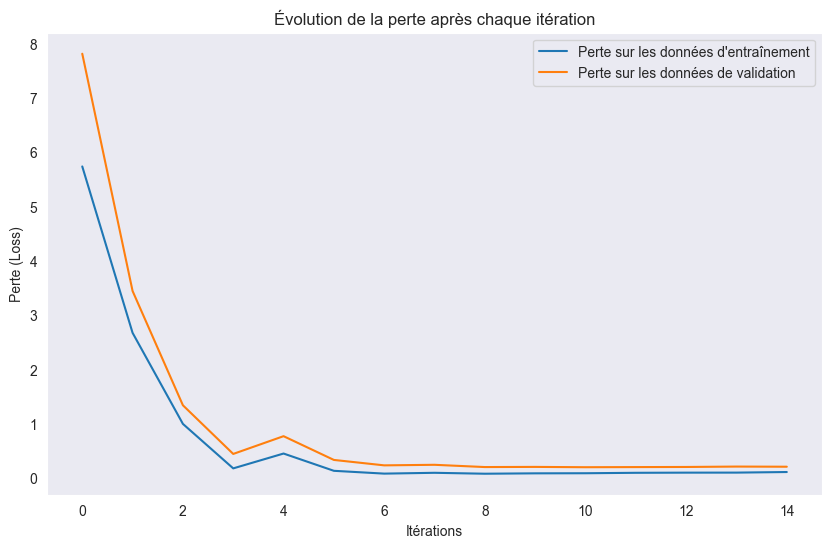

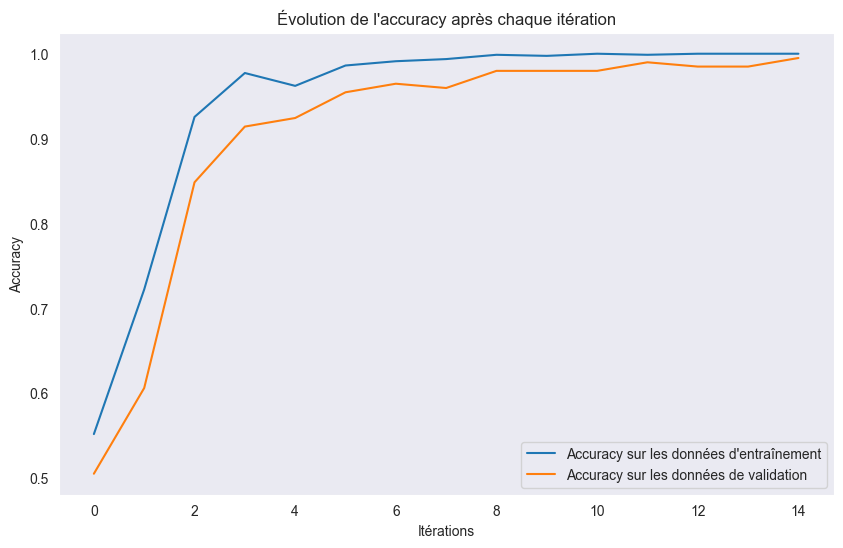

In [51]:
steps = range(max_iter)

plt.figure(figsize=(10, 6))
plt.plot(steps, losses_train, label='Perte sur les données d\'entraînement')
plt.plot(steps, losses_val, label='Perte sur les données de validation')
plt.xlabel('Itérations')
plt.ylabel('Perte (Loss)')
plt.title('Évolution de la perte après chaque itération')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(steps, accuracies_train, label='Accuracy sur les données d\'entraînement')
plt.plot(steps, accuracies_val, label='Accuracy sur les données de validation')
plt.xlabel('Itérations')
plt.ylabel('Accuracy')
plt.title('Évolution de l\'accuracy après chaque itération')
plt.legend()
plt.grid()
plt.show()

## Entrainement Logistic Regression

Implementation naïve de Logistic Regression

In [52]:
from src.models.metrics import Measure
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', penalty='l1')
lr_model.fit(x_train, y_train)

metrics = Measure(lr_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()


Train Score:
Accuracy : 0.9191919191919192
Precision : 0.931349935137814
Recall : 0.9191919191919192
F1-score : 0.914911500799014

Test Score :
Accuracy : 0.8484848484848485
Precision : 0.8535353535353535
Recall : 0.8484848484848485
F1-score : 0.8306397306397306


#### La recherche d'hyperparametre pour la logistic regression

In [53]:
lr_param_grid = {
    'solver': ['lbfgs', 'liblinear', 'newton-cholesky'],
    'C': np.logspace(-3, 3, 7),
    'penalty' : ['l1', 'l2', 'elasticnet', None],
}

lr_model = LogisticRegression(random_state=42)

lr_cross_val = CrossValidate(model=lr_model, params=lr_param_grid, k_fold=4, metric='accuracy')
lr_cross_val.train(x_train, y_train)

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_hp_lr = lr_cross_val.best_params
best_lr_model = lr_cross_val.best_model
# Afficher les meilleurs hyperparamètres trouvés
print("Logistic Regression Meilleurs hyperparamètres :", best_hp_lr)
metrics = Measure(best_lr_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()


Logistic Regression Meilleurs hyperparamètres : {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

Train Score:
Accuracy : 0.9987373737373737
Precision : 0.9988776655443322
Recall : 0.9987373737373737
F1-score : 0.998732422261834

Test Score :
Accuracy : 0.98989898989899
Precision : 0.9932659932659934
Recall : 0.98989898989899
F1-score : 0.9892255892255892


## Entrainement MLP

Implementation naïve de MLP

In [54]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(5,), random_state=42)
mlp_model.fit(x_train, y_train)
print(f"Meilleurs loss {mlp_model.best_loss_}")
metrics = Measure(mlp_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()


Meilleurs loss 1.663734527885141

Train Score:
Accuracy : 0.7108585858585859
Precision : 0.7248440870544256
Recall : 0.7108585858585859
F1-score : 0.6684635481302517

Test Score :
Accuracy : 0.6363636363636364
Precision : 0.6131313131313132
Recall : 0.6363636363636364
F1-score : 0.5947570947570947


Avec l'implementation naïve de MLP il faut plus de 5000 iterations pour converger, 

#### Analyse de l'amélioration de parametre avec les nombres de couche 

Est-qu'augmenter le nombre de couches améliore nos performances ?

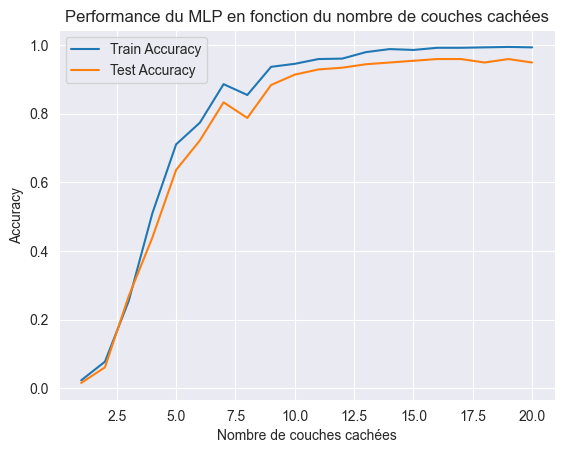

In [55]:
# Définir une plage de valeurs pour le nombre de couches cachées
max_layer = 21
hidden_layer_sizes = [(i,) for i in range(1, max_layer)]  # de 1 à 20 couches cachées

# Initialiser des listes pour stocker les performances
train_accuracy = []
test_accuracy = []

# Boucler sur chaque nombre de couches cachées
for hidden_layers in hidden_layer_sizes:
    # Initialiser le classifieur MLP avec le nombre de couches cachées actuel
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, random_state=42)
    
    # Entraîner le modèle sur les données d'entraînement
    mlp.fit(x_train, y_train)
    
    # Prédire les étiquettes sur les données d'entraînement et de test
    y_train_pred = mlp.predict(x_train)
    y_test_pred = mlp.predict(x_test)
    
    # Calculer l'accuracy sur les données d'entraînement et de test
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Tracer la performance du MLP en fonction du nombre de couches cachées
plt.plot(range(1, max_layer), train_accuracy, label='Train Accuracy')
plt.plot(range(1, max_layer), test_accuracy, label='Test Accuracy')
plt.xlabel('Nombre de couches cachées')
plt.ylabel('Accuracy')
plt.title('Performance du MLP en fonction du nombre de couches cachées')
plt.legend()
plt.show()

Est-qu'augmenter le nombre de couches optimise l'erreur de notre modele MLP ?

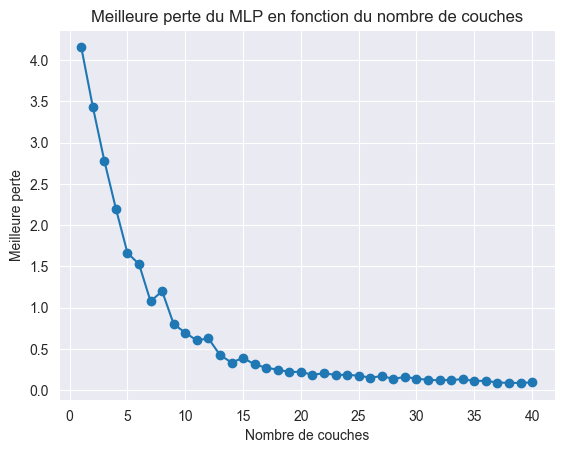

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
max_layer = 41
hidden_layer_sizes = [(i,) for i in range(1, max_layer)] 
# Paramètres pour les différentes architectures de MLP
layer_sizes = hidden_layer_sizes 
best_losses = []

# Entraîner le modèle pour chaque architecture et enregistrer la meilleure perte
for sizes in layer_sizes:
    mlp_model = MLPClassifier(hidden_layer_sizes=sizes, random_state=42)
    mlp_model.fit(x_train, y_train)
    best_losses.append(mlp_model.best_loss_)

# Afficher la meilleure perte en fonction du nombre de couches
plt.plot(range(1, max_layer), best_losses, marker='o')
plt.title('Meilleure perte du MLP en fonction du nombre de couches')
plt.xlabel('Nombre de couches')
plt.ylabel('Meilleure perte')
#plt.xticks(range(len(layer_sizes)), range(1, max_layer, 10))
plt.grid(True)
plt.show()

trouvons les meilleurs compromis entre nombre des couches et autres hyperparametres

#### La recherche des meillleurs hyperparametre pou MLP

In [57]:
from src.models.train_model import CrossValidate
from sklearn.neural_network import MLPClassifier

# Définir les hyperparamètres à rechercher
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],
    'activation': ['relu', 'tanh','softmax', 'elu', 'selu'],
    # Différentes valeurs pour alpha pour tester la régularisation L2
    'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1] ,
    'early_stopping': [True],
    'n_iter_no_change': [5, 10, 20]
}

# Créer une instance du modèle MLP
mpl_model = MLPClassifier()

# Effectuer une recherche des hyperparamètres avec validation croisée
grid_search = CrossValidate(model=mpl_model, params=param_grid, k_fold=4, metric='accuracy')
grid_search.train(x_train, y_train)


In [58]:
print("MLP Meilleurs hyperparamètres :", grid_search.best_params)

MLP Meilleurs hyperparamètres : {'activation': 'relu', 'alpha': 1e-05, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'n_iter_no_change': 20}


La recheche de mailleurs hyperparametre nous montre  que nous n'avons pas besoin d'une structure complexe pour avoir de meilleurs resultat seulement avec hidden_layer_sizes de (100,) c'est déjà suffisant.

In [59]:
best_mlp_model = grid_search.best_model

# Afficher les meilleurs hyperparamètres trouvés
print("MLP Meilleurs hyperparamètres :", grid_search.best_params)

y_pred_proba = best_mlp_model.predict_proba(x_test)  # Probabilités prédites pour log_loss
# Calculer la perte (loss)
loss = log_loss(y_test, y_pred_proba)

print(f"Log Loss : {loss}")

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés

metrics = Measure(best_mlp_model,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()

MLP Meilleurs hyperparamètres : {'activation': 'relu', 'alpha': 1e-05, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'n_iter_no_change': 20}
Log Loss : 0.7870257756990806

Train Score:
Accuracy : 0.98989898989899
Precision : 0.9908810325476993
Recall : 0.98989898989899
F1-score : 0.989864329570212

Test Score :
Accuracy : 0.9595959595959596
Precision : 0.9747474747474747
Recall : 0.9595959595959596
F1-score : 0.9575757575757576


Loss curve

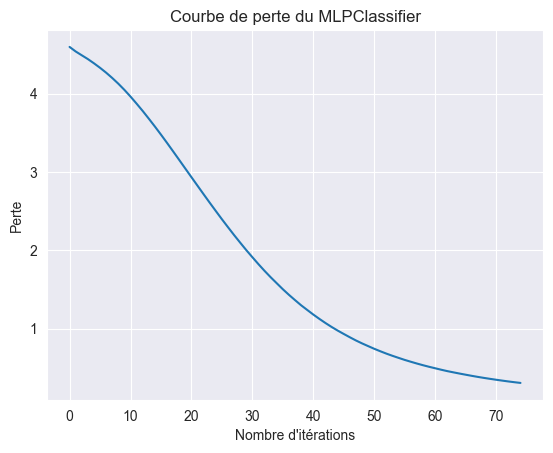

In [60]:
plt.plot(best_mlp_model.loss_curve_)
plt.title('Courbe de perte du MLPClassifier')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Perte')
plt.show()

Accuracy curve

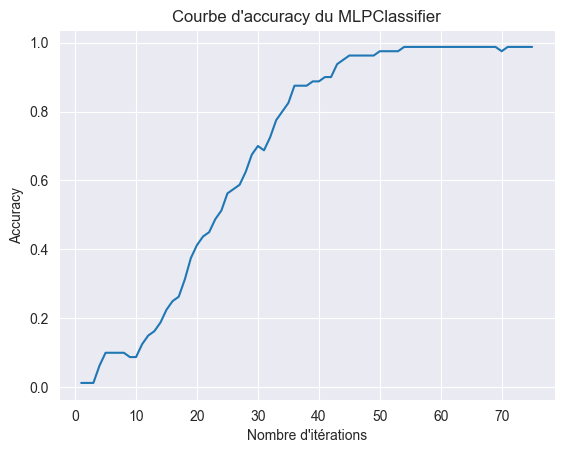

In [61]:

# Récupérer l'accuracy à chaque itération
train_accuracy = best_mlp_model.validation_scores_

# Afficher la courbe d'accuracy
plt.plot(np.arange(1, len(train_accuracy) + 1), train_accuracy)
plt.title('Courbe d\'accuracy du MLPClassifier')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Accuracy')
plt.show()

##

### Résultats

Résultats :

| Model               | Best Parameter | Accuracy Train Score | Accuracy Test Score |
|---------------------|----------------|----------------------|---------------------|
| GNB                 |                | 99%                  | 98%                 |
| SGD                 |                | 99%                  | 98%                 |
| Random Forest       |                | 100%                 | 98%                 |
| Logistic Regression |                | 99%                  | 98%                 |
| SVM                 |                | 100%                 | 98%                 |
| MLP                 |                | 99%                  | 97%                 |


- GNB Meilleur var_smoothing trouvé: {'var_smoothing': 0.01}
- Ramdom Forest Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
- SGD Meilleurs hyperparamètres : {'alpha': 0.0001, 'loss': 'log_loss', 'penalty': 'l2'}
- SVM Meilleurs hyperparamètres : {'C': 0.1, 'degree': 1, 'gamma': 10, 'kernel': 'poly'}
- Logistic Regression Meilleurs hyperparamètres : {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
- MLP Meilleurs hyperparamètres : {'activation': 'relu', 'alpha': 1e-05, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'n_iter_no_change': 20}

============================================================================

# Reduction de dimension avec PCA

 Comme on pu le remarrquer plus haut, la trop frande quantité d'attribut empeche une visualisation correcte des données.
Nous allons tenter de réduits la dimension de nos données et voir l'influence sur les performances de nos modèles.

Comment allons nous décider du nombre de composantes environs à utiliser? Un bon indice peut être obtenu via une ACP.

In [62]:
import plotly.graph_objects as go
import numpy as np
from sklearn.decomposition import PCA

X_acp = x_train
pca = PCA().fit(X_acp)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=list(range(1, len(cumulative_variance_ratio) + 1)),  # Conversion en liste
    y=cumulative_variance_ratio,
    mode='lines+markers',
    marker=dict(symbol='circle', size=8),
    line=dict(dash='dash'),
))

fig.update_layout(
    xaxis_title='Nombre de composants',
    yaxis_title='Ratio de variance expliquée cumulée',
    title='Ratio de variance expliquée cumulée par nombre de composantes',
)

fig.show()

 #### Entrainenement du random Forest aprés reduction de dimension 

In [63]:
### Random Forest avec reduction de dimension PCA 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

    
# Création d'un pipeline avec standardisation, PCA et classification
rf_pipeline = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('classifier',RandomForestClassifier())
])
    
# Entraînement du modèle
rf_pipeline.fit(x_train, y_train)

# Prédictions sur les données de test
metrics = Measure(rf_pipeline,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()


Train Score:
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1-score : 1.0

Test Score :
Accuracy : 0.9949494949494949
Precision : 0.9966329966329965
Recall : 0.9949494949494949
F1-score : 0.9946127946127946


L'entrainement aprés reduction de dimension donne un bon resultats aussi mais la recherche d' hyperparametre est suffisant pour notre dataset.

 #### Entrainenement du MLP aprés reduction de dimension 

In [64]:
from sklearn.neural_network import MLPClassifier

mlp_pipeline = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('classifier',MLPClassifier())
])

mlp_pipeline.fit(x_train, y_train)
metrics = Measure(mlp_pipeline,x_train,y_train, x_test, y_test)
metrics.show_metrics_train()
metrics.show_metrics_test()


Train Score:
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1-score : 1.0

Test Score :
Accuracy : 0.98989898989899
Precision : 0.9932659932659934
Recall : 0.98989898989899
F1-score : 0.9892255892255892


In [65]:
def acp_performances(model_fitted, X_test, y_test):
    y_pred = model_fitted.predict(X_test)

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    return accuracy, precision, recall, f1

In [66]:
# Réalisation de l'ACP
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# métriques pour svc
acc_acp_svc = []
pre_acp_svc = []
rec_acp_svc = []
f1s_acp_svc = []

# métriques pour sgdc
acc_acp_sgdc = []
pre_acp_sgdc = []
rec_acp_sgdc = []
f1s_acp_sgdc = []


    
for i in range(70, 193):
    # Création d'un pipeline avec standardisation, PCA et classification
    svc_pipeline = Pipeline([
        #('scaler', StandardScaler()),
        ('pca', PCA(n_components=i)),
        # avec les meilleurs hyperparametres trouvées
        ('classifier', model_svc)
    ])

    sgdc_pipeline = Pipeline([
        #('scaler', StandardScaler()),
        ('pca', PCA(n_components=i)),
        # avec les meilleurs hyperparametres trouvées
        ('classifier', model_sgdc)
    ])
    
    # Entraînement du modèle
    svc_pipeline.fit(x_train, y_train)
    sgdc_pipeline.fit(x_train, y_train)
    
    # Résultat après entrainement

    #SVC
    acc_svc, pre_svc, rec_svc, f1s_svc = acp_performances(svc_pipeline, x_test, y_test)
    acc_acp_svc.append(acc_svc)
    pre_acp_svc.append(pre_svc) 
    rec_acp_svc.append(rec_svc) 
    f1s_acp_svc.append(f1s_svc) 

    #SGDC
    acc_sgdc, pre_sgdc, rec_sgdc, f1s_sgdc = acp_performances(sgdc_pipeline, x_test, y_test)
    acc_acp_sgdc.append(acc_sgdc)
    pre_acp_sgdc.append(pre_sgdc) 
    rec_acp_sgdc.append(rec_sgdc) 
    f1s_acp_sgdc.append(f1s_sgdc)

In [67]:
import plotly.graph_objects as go
x_data = list(range(70, 193))

In [68]:
# SVC
acc_curve_svc = go.Scatter(x=x_data, y=acc_acp_svc, mode='lines', name='Accuracy')
pre_curve_svc = go.Scatter(x=x_data, y=pre_acp_svc, mode='lines', name='Precision')
rec_curve_svc = go.Scatter(x=x_data, y=rec_acp_svc, mode='lines', name='Recall')
f1s_curve_svc = go.Scatter(x=x_data, y=f1s_acp_svc, mode='lines', name='F1Score')

fig_svc = go.Figure()
fig_svc.add_trace(acc_curve_svc)
fig_svc.add_trace(pre_curve_svc)
fig_svc.add_trace(rec_curve_svc)
fig_svc.add_trace(f1s_curve_svc)

fig_svc.update_layout(title='Performances en fonction du nombre de composants',
                   xaxis_title='Nombre de composantes',
                   yaxis_title='Valeurs des métriques')

fig_svc.show()

In [69]:
acc_curve_sgdc = go.Scatter(x=x_data, y=acc_acp_sgdc, mode='lines', name='Accuracy')
pre_curve_sgdc = go.Scatter(x=x_data, y=pre_acp_sgdc, mode='lines', name='Precision')
rec_curve_sgdc = go.Scatter(x=x_data, y=rec_acp_sgdc, mode='lines', name='Recall')
f1s_curve_sgdc = go.Scatter(x=x_data, y=f1s_acp_sgdc, mode='lines', name='F1Score')

fig_sgdc = go.Figure()
fig_sgdc.add_trace(acc_curve_sgdc)
fig_sgdc.add_trace(pre_curve_sgdc)
fig_sgdc.add_trace(rec_curve_sgdc)
fig_sgdc.add_trace(f1s_curve_sgdc)

fig_sgdc.update_layout(title='Performances en fonction du nombre de composants',
                   xaxis_title='Nombre de composantes',
                   yaxis_title='Valeurs des métriques')

fig_sgdc.show()

## Voting Classifier

Faire voter les meilleurs modele

GNB Meilleur var_smoothing trouvé: {'var_smoothing': 0.01}
Ramdom Forest Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
SGD Meilleurs hyperparamètres : {'alpha': 0.0001, 'loss': 'log_loss', 'penalty': 'l2'}
SVM Meilleurs hyperparamètres : {'C': 0.1, 'degree': 1, 'gamma': 10, 'kernel': 'poly'}
Logistic Regression Meilleurs hyperparamètres : {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
MLP Meilleurs hyperparamètres : {'activation': 'relu', 'alpha': 1e-05, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'n_iter_no_change': 20}



In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


gnb_clf = GaussianNB(var_smoothing=0.01)
lr_clf = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', random_state=42)
rf_clf = RandomForestClassifier(criterion = 'gini', min_samples_split = 2, n_estimators = 100, random_state=42)
sdg_clf = SGDClassifier(alpha=0.0001, loss='log_loss', penalty='l2', random_state=42)
svm_clf = SVC(C=1.0, degree=1, gamma=10, kernel= 'poly', random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)

_estimators = [
        ('lr', lr_clf), 
        ('rf', rf_clf), 
        ('gnb', gnb_clf),
        ('sdg',sdg_clf),
        ('svm', svm_clf), 
        ('mlp',mlp_clf),  
    ]
m_model = [
    'Logistic Regression', 
    'Random Forest', 
    'Gaussian Naive Bayes', 
    'Stochastic Gradient Descent', 
    'Support Vector Machine', 
    'Multi-Layer Perceptron', 
    'Ensemble Vote']

voting_clf = VotingClassifier(
    estimators=_estimators,
    voting='hard')

m_estimators = _estimators.copy()
m_estimators.append(('voting', voting_clf))

for clf, label in zip(m_estimators, m_model ):
    scores = cross_val_score(clf[1], x_train, y_train, scoring='accuracy', cv=4)
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.9874 (+/- 0.0025) [Logistic Regression]
Accuracy: 0.9672 (+/- 0.0076) [Random Forest]
Accuracy: 0.9773 (+/- 0.0091) [Gaussian Naive Bayes]
Accuracy: 0.9684 (+/- 0.0042) [Stochastic Gradient Descent]
Accuracy: 0.9874 (+/- 0.0076) [Support Vector Machine]
Accuracy: 0.9798 (+/- 0.0000) [Multi-Layer Perceptron]
Accuracy: 0.9861 (+/- 0.0042) [Ensemble Vote]


Accuracy: 0.9874 (+/- 0.0025) [Logistic Regression]
Accuracy: 0.9672 (+/- 0.0076) [Random Forest]
Accuracy: 0.9773 (+/- 0.0091) [Gaussian Naive Bayes]
Accuracy: 0.9684 (+/- 0.0042) [Stochastic Gradient Descent]
Accuracy: 0.9874 (+/- 0.0076) [Support Vector Machine]
Accuracy: 0.9798 (+/- 0.0000) [Multi-Layer Perceptron]
Accuracy: 0.9861 (+/- 0.0042) [Ensemble Vote]